In [5]:
# Importing necessary libraries
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [6]:
#Importing data
data = pd.read_csv("./heart.csv")
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0     40   M           ATA        140          289          0     Normal  \
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

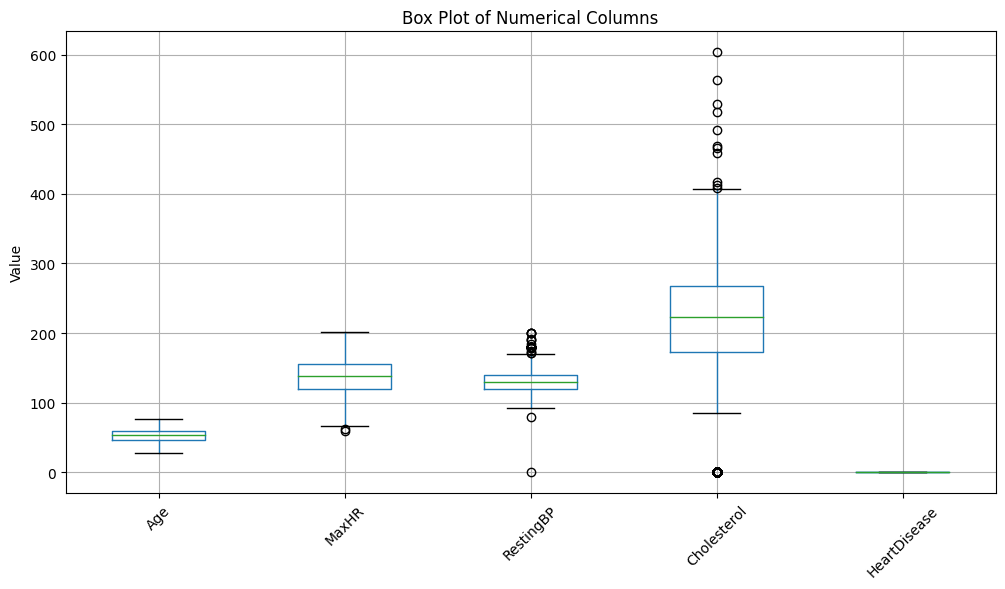

In [8]:
# Picking out the outliers
import matplotlib.pyplot as plt

num_cols = ['Age', 'MaxHR', 'RestingBP', 'Cholesterol', 'HeartDisease']
plt.figure(figsize=(12, 6))
data[num_cols].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Removing the outliers with the help of Z score
zscores = stats.zscore(data[num_cols])
threshold = 3
outliers = (zscores > threshold).any(axis=1)
removed_outliers = data[~outliers]

In [10]:
# Converting text columns to numbers
def encode_categorical_columns(dataframe, columns_to_label_encode, columns_to_onehot_encode):
    label_encoder = LabelEncoder()
    for col in columns_to_label_encode:
        dataframe[col] = label_encoder.fit_transform(dataframe[col])
        
    dataframe = pd.get_dummies(dataframe, columns=columns_to_onehot_encode, drop_first=True)
    return dataframe
    data = pd.concat([data, onehot_encoded], axis=1)

    return dataframe

In [11]:
# Applying Scaling 
def apply_scaling(dataframe, columns_to_scale):
    scaler = StandardScaler
    num_cols = ['Age', 'MaxHR', 'RestingBP', 'Cholesterol', 'HeartDisease']
    data[num_cols] = scaler.fit_transform(data[num_cols])

    return dataframe

label_encode = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
onehot_encode = ["ChestPainType", "RestingECG", "ST_Slope"]

new_data = df = encode_categorical_columns(data, label_encode, onehot_encode)

In [12]:
# Calculating the accuracy of SVM
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
accuracy_of_SVM = accuracy_score(y_test, svm_predictions)
print(accuracy_of_SVM)

0.6847826086956522


In [13]:
# Calculating the decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

prediction_of_decision_tree_model = decision_tree_model.predict(X_test)
accuracy_of_decision_tree_model = accuracy_score(y_test, prediction_of_decision_tree_model)

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train, y_train)

prediction_of_bagging = bagging_model.predict(X_test)
accuracy_of_bagging = accuracy_score(y_test, prediction_of_bagging)
print(accuracy_of_bagging)

0.8369565217391305


/Users/waseemrajashaik/Desktop/artificial_intelligence_algorithms/class_notes_test/venv/aiml_math_class/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The accuracy of SVM is better than that of Decision Tree. Also the accuracy changes if we take other variables. 
Decision trees may overfit after bagging however the SVM turns out to be better then decision tree in this way as well.